# Exploration

Let's explore the interactions of all attributes and target variable to help discover drivers of our target variable. 

In [2]:
#standard ds imports
import pandas as pd
import numpy as np

#viz and stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr


## Acquire and Prepare Data

We're going to acquire the student grade data like we saw in the prior lesson.

In [4]:
df = pd.read_csv('student_grades.csv')

In [5]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [7]:
df.exam3.value_counts()

78    16
96    16
75    15
95     8
94     8
86     8
87     8
79     8
70     8
85     8
       1
Name: exam3, dtype: int64

In [8]:
df.exam3.astype(float)

ValueError: could not convert string to float: ''

In [ ]:
# itsy bitsy regex preview for very smols:
# r'' : raw string for regex, like our f'' strings
# ^ == begins with
# \s == any whitespace character
# * == zero or more times
# $ == ends with

In [13]:
df['exam3'] = df.exam3.replace(r'^\s*$', np.nan, regex=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [15]:
df.isna().sum()

student_id     0
exam1          1
exam2          0
exam3          1
final_grade    0
dtype: int64

In [16]:
# remove the two null values that I had present in the data set
df = df.dropna()

In [19]:
# check that the int version of exam1 is the same as exam1 as a float
(df.exam1.astype(int) != df.exam1).sum()

0

In [20]:
# everything else in the dataframe is an int-shaped thing, so
# i'm going to go ahead and cast the entire dataframe as integers
df = df.astype(int)

In [21]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# train test split:
train_val, test = train_test_split(df, 
                                   train_size=0.8,
                                   random_state=1349)
train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1349)

In [24]:
train.shape, validate.shape, test.shape

((56, 5), (25, 5), (21, 5))

In [25]:
# let's use train to do the rest of our examinations:
# we will go ahead and just use the columns that we want to explore
columns = train.drop(columns=['final_grade', 'student_id']).columns.to_list()

In [26]:
train_scaled = train.copy()

In [28]:
from sklearn.preprocessing import MinMaxScaler
train_scaled = MinMaxScaler().fit_transform(train.drop(
    columns=['final_grade', 'student_id']))

In [ ]:
# Use our wrangle function to acquire and prepare our data.
# jk jk

In [29]:
#look at your data!
# make an x_train and a y_train out of our training data
# by (for X): narrowing down the lens to just the columns for X (independent vars)
# by (for y): looking just at the target variable
X_train, y_train = train[columns], train[['final_grade']]

In [31]:
X_train.head()

,exam1,exam2,exam3
0,100,90,95
63,57,65,75
26,100,90,95
102,57,65,75
52,100,90,95


#### target variable?
- final grade!
- continious aka regression problem

#### other variables of value?
- exam1, exam2, exam3
- all continious

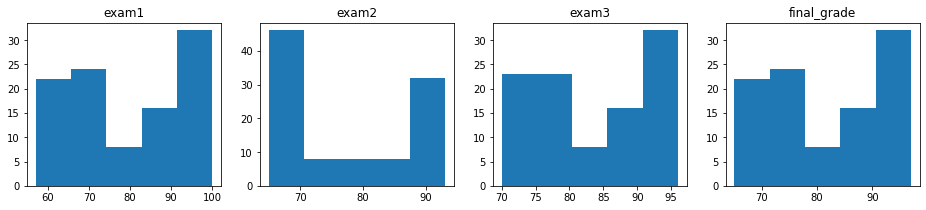

In [34]:
plt.figure(figsize=(16, 3))

# List of columns
cols = ['exam1', 'exam2', 'exam3', 'final_grade']
for i, col in enumerate(cols):
    # i starts at 0, but plot nos should start at 1
    subplot_num = i+1
    # Create subplot.
    plt.subplot(1,4,subplot_num)
    # Title with column name.
    plt.title(col)
    # Display histogram for column.
    df[col].hist(bins=5)
    # Hide gridlines.
    plt.grid(False)

In [ ]:
#train, validate, test split


## Explore

### Why Explore?
 - What is the purpose of this pipeline stage?

### Main Stages in Exploration
- Hypothesize
- Visualize
    - Plot out the distributions of each feature 
     - Why?
    - Plot out the interaction of two or more variables?
     - Why?
    - Plot out how subgroups compare to each-other and to the overall population?
     - Why?
    - Document takeaways
     - Why?
    - Identify features that correlate with each other
     - Why?

- Test Hypotheses

### Types of Visualizations

- **Univariate Distributions**
    
    - Continuous variable distributions
        - histogram
        - boxplot
        - displot
    - Discrete variable distributions
        - countplot


- **Bi- and multi-variate relationships** 

    - Continuous with Continuous
        - scatter
        - line
        - pairplot
        - heatmap
        - relplot
    - Discrete with Continuous
        - violin
        - catplot
        - sunburst
        - boxplot
        - swarmplot
        - striplot
        
    - Discrete with Discrete
        - heatmap

___

## Explore our exam dataset
### Goal

> I'm a university professor hoping I can build a prediction model that will be able to use these exams to predict the final grade within 5 points average per student.

## Q1. Is there a relationship between exam1 and final grade? 

- both of my variables are continious
- check for correlation

### Hypothesis

- ${H_0}$: there is no there ordinal correlation between exam1 and final_grade
- ${H_a}$:  there is an ordinal correlation between exam1 and final_grade

### Visualize

### `sns.heatmap()`

Let's look at a heatmap of the correlation coefficients for a dataset.

1. Determine if normally distributed
    - if normal, use pearsons method
    - if not, use spearman
2. Calculate the correlation coefficient for each pair of variables
    - use pandas `.corr()` 
    - it defaults to `method=pearson`
    - can change to `method=spearman`
3. Use correleation coefficients to generate heatmap 


In [35]:
train.columns

Index(['student_id', 'exam1', 'exam2', 'exam3', 'final_grade'], dtype='object')

In [36]:
# create the correlation matrix using pandas .corr()
exam_corr = train.drop(columns='student_id').corr(method='spearman')

In [37]:
exam_corr

,exam1,exam2,exam3,final_grade
exam1,1.000000,0.934609,0.904337,0.965991
exam2,0.934609,1.000000,0.935703,0.893634
exam3,0.904337,0.935703,1.000000,0.929937
final_grade,0.965991,0.893634,0.929937,1.000000


<AxesSubplot:>

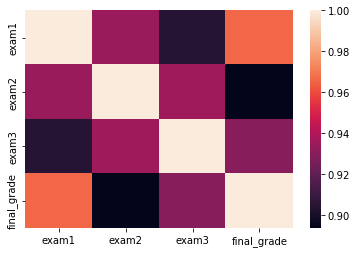

In [38]:
# pass my correlation matrix to Seaborn's heatmap
sns.heatmap(exam_corr)

In [40]:
np.triu(exam_corr)

array([[1.        , 0.93460939, 0.90433748, 0.96599108],
       [0.        , 1.        , 0.93570304, 0.89363405],
       [0.        , 0.        , 1.        , 0.92993732],
       [0.        , 0.        , 0.        , 1.        ]])

<AxesSubplot:>

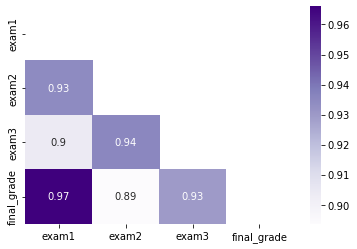

In [42]:
sns.heatmap(exam_corr,
           cmap='Purples',
           annot=True,
           mask=np.triu(exam_corr))

<AxesSubplot:>

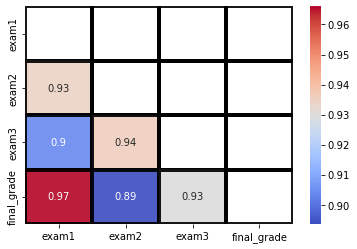

In [47]:
# pass my correlation matrix to Seaborn's heatmap with more customization! 
kwargs = {'alpha':.9,
          'linewidth':3, 
          'linestyle':'-',
          'linecolor':'black',
          'cmap': 'coolwarm',
          'annot': True,
          'mask': np.triu(exam_corr)}
# function call has no more stuff inline
sns.heatmap(exam_corr,
            **kwargs)

### Test Hypothesis

In [49]:
# Since my variables are not normally distributed, 
# use scipy stats function spearmanr to calculate correlation and p-value 
r, p = spearmanr(train['exam1'], train['final_grade'])

In [51]:
if p < 0.05:
    print('We can reject our null hypothesis!')
else:
    print('We failed ro reject the null hypothesis!')

We can reject our null hypothesis!


In [52]:
r

0.9659910838576217

In [53]:
p

2.1277109074216448e-33

#### Heatmap Takeaways

- Although all of the exams have very high positive correlations with the target variable, `exam1` and `final_grade` are almost perfectly correlated. This looks to be the best predictor of our target variable.
- Based on my correlation coefficient and my p-value, **I reject my Null hypothesis that there is no correlation between `exam1` and `final_grade`.**
- Looking at the correlation between our independent variables, they also have high positive correlations with each other, multicollinearity. This informs me that I don't want to use all of them together in a linear regression model. 
- When building my model, I will choose `exam1` and perform a simple linear regression first. If I want to go back and do some feature engineering with my other independent variables, I could do that and see if I can improve on my accuracy.

### What other visualizations could we have used?

### `sns.relplot()`

Let's do a simple scatter plot of two continuous variables in our dataset.

In [54]:
# if big dataset:remember df.sample(some_number)

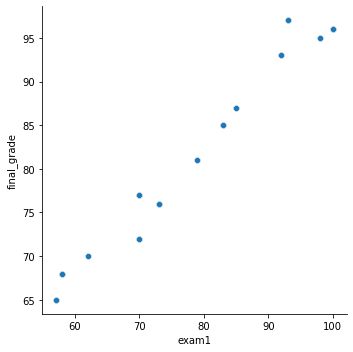

In [56]:
sns.relplot(data=train,
            x='exam1',
            y='final_grade')
plt.show()

### `sns.lmplot()`

Let's make that simple scatter plot but add a regression line.

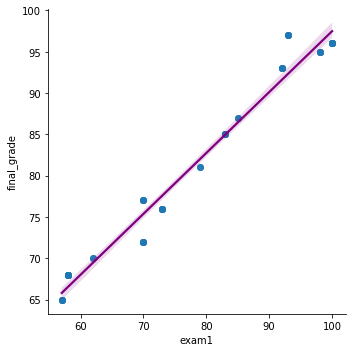

In [59]:
# I can really pop that line color if I want
sns.lmplot(data=train,
           x='exam1',
           y='final_grade',
          line_kws={'color': 'purple'})

### `sns.jointplot()`

Let's use a `sns.jointplot()` with `kind=reg` to view individual variable distributions for our x and y along with a scatter plot with regression line.

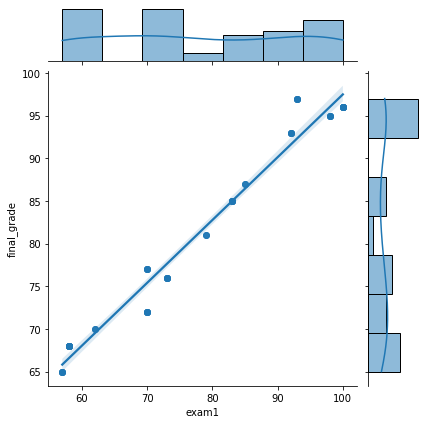

In [61]:
sns.jointplot(data=train,
              x='exam1',
              y='final_grade',
             kind='reg')

### `sns.pairplot()`

Let's use `sns.pairplot()` to view a scatter plot visualizing the relationships between all of the numeric columns in our dataset all at once as well as individual distributions for each individual column.

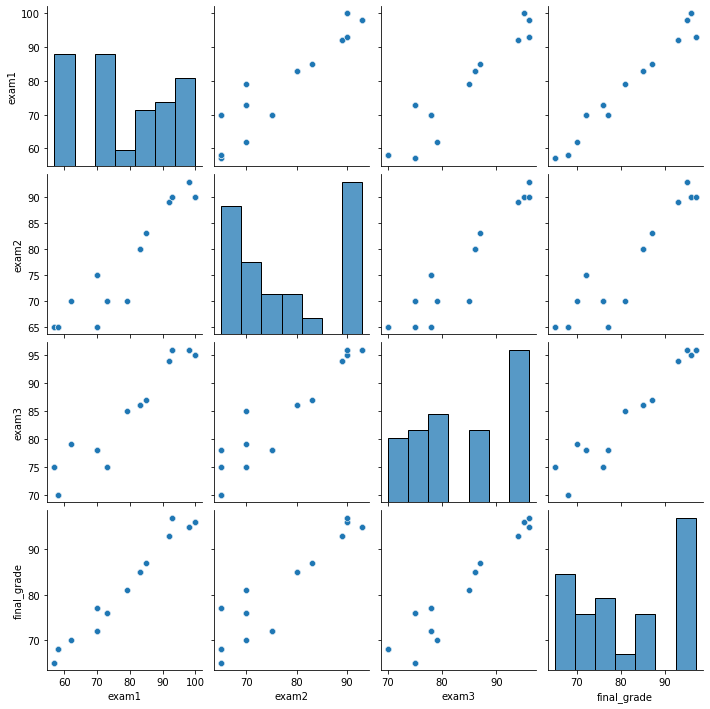

In [63]:
# We can drop the redundant information in the upper right half of the chart if we like.
sns.pairplot(train.drop(columns='student_id'))

Takeways
- My `relplot`, `lmplot`, and `jointplots` charts show me that there is a linear relationship between `exam1` and `final_grade`.
- My `pairplot` shows me that there are linear relationships between the other exams scores, as well 

___

## Q2: Is there a cutoff in grade that makes sense to investigate? Passing/failing/letter grades?

In [64]:
#number of people who failed each test
# how do we define failing?
# I'm going to use a standard 70 cutoff

In [67]:
for col in train.drop(columns='student_id').columns:
    num = (train[col] < 70).sum()
    total = len(train)
    print(f'{num} out of {total} students failed {col}')

14 out of 56 students failed exam1
16 out of 56 students failed exam2
0 out of 56 students failed exam3
12 out of 56 students failed final_grade


### Make categorical values for further exploration

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [70]:
#assign fail and pass for each test
for col in train.drop(columns='student_id').columns:
    train[f'passed_{col}'] = np.where(train[col] >= 70, 1, 0)

In [78]:
train[['exam1', 'passed_exam1']]

,exam1,passed_exam1
0,100,1
63,57,0
26,100,1
102,57,0
52,100,1
88,58,0
17,93,1
90,70,1
95,93,1
25,70,1


In [72]:
train[[col for col in train.columns if col.startswith('pass')]].head()

,passed_exam1,passed_exam2,passed_exam3,passed_final_grade,passed_passed_exam1,passed_passed_exam2,passed_passed_exam3,passed_passed_final_grade
0,1,1,1,1,0,0,0,0
63,0,0,1,0,0,0,0,0
26,1,1,1,1,0,0,0,0
102,0,0,1,0,0,0,0,0
52,1,1,1,1,0,0,0,0


### Whats the relationship between passing exam1 and the final_exam grade?

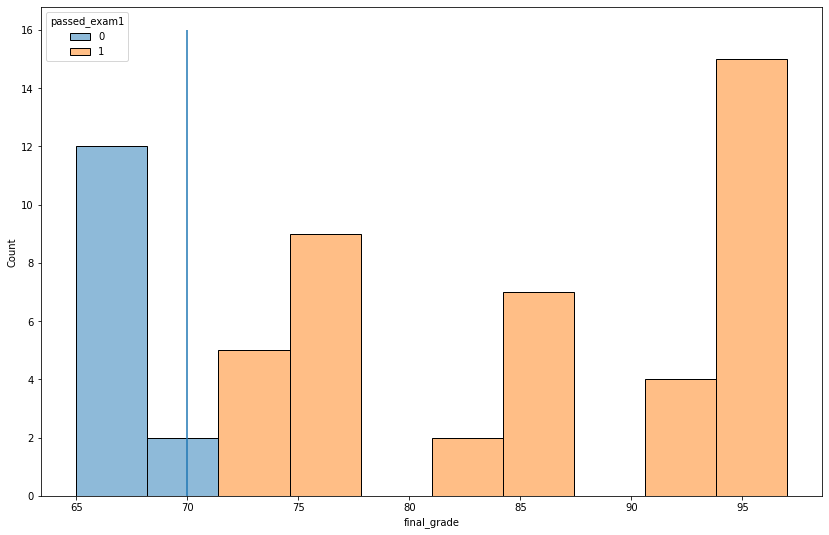

In [81]:
#seaborn histplot 
plt.figure(figsize=(14,9))
sns.histplot(data=train,
             x='final_grade',
             hue='passed_exam1',
             bins=10)
plt.vlines(70, 0, 16)
plt.show()

In [84]:
#mean final_grade by exam1 pass/fail status
train.groupby('passed_exam1').final_grade.max()

passed_exam1
0    70
1    97
Name: final_grade, dtype: int64

### What percentage of students failed exam1 and the final?

In [93]:
((train['exam1'] < 70) & (train.final_grade < 70)).sum(
) / len(train) * 100

21.428571428571427

In [ ]:
# approximately 21 % failed both the first exam and the final.
# note that this is NOT THE SAME as the percent of students that 
# failed exam 1 that also failed the final!

In [92]:
train[(train['exam1'] < 70) & (train['final_grade'] < 70)]

,student_id,exam1,exam2,exam3,final_grade,passed_exam1,passed_exam2,passed_exam3,passed_final_grade,passed_passed_exam1,passed_passed_exam2,passed_passed_exam3,passed_passed_final_grade
63,64,57,65,75,65,0,0,1,0,0,0,0,0
102,103,57,65,75,65,0,0,1,0,0,0,0,0
88,89,58,65,70,68,0,0,1,0,0,0,0,0
101,102,58,65,70,68,0,0,1,0,0,0,0,0
10,11,58,65,70,68,0,0,1,0,0,0,0,0
89,90,57,65,75,65,0,0,1,0,0,0,0,0
23,24,58,65,70,68,0,0,1,0,0,0,0,0
49,50,58,65,70,68,0,0,1,0,0,0,0,0
24,25,57,65,75,65,0,0,1,0,0,0,0,0
36,37,58,65,70,68,0,0,1,0,0,0,0,0


### Of the students who failed exam1, how many also failed the final?

In [97]:
# OUT OF THE STUDENTS THAT FAILED EXAM 1,
# we see that nearly 86% of that population fail the final
(train[train.exam1 < 70].final_grade < 70).mean() * 100

85.71428571428571

### Of the students who failed exam2, how many also failed the final?

In [99]:
#create subset of people who failed exam2
subset = train[train.passed_exam2 == 0]

In [110]:
#how many failed final
(subset.final_grade < 70).sum()

12

### Of the students who failed both exam1 and exam2, how many also failed the final?

In [112]:
#create subset of people who failed exam2
subset = train[(train.exam1 < 70) & (train.exam2 < 70)]

In [114]:
#how many failed final
(subset.final_grade < 70).sum()

12

In [116]:
len(subset)

12

In [115]:
(subset.final_grade < 70).mean() * 100

100.0

#### Takeways
- exam1 and exam2 have a better reflection if someone passes the final exam
- given the multicollinearity present, we may want to just focus on one exam
- if i had time, we could create a new feature that captures if a student failed both exam1 and exam2 